<a href="https://colab.research.google.com/github/YashkumarBhatt/Unified-Mentor-Internship/blob/main/Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project analyzes the stock market performance over four months (February to May 2023) of Apple (AAPL), Google (GOOG), Microsoft (MSFT) and NETFLIX (NFLX), using Exploratory Data Analysis (EDA) and Machine Learning to forecast future trends.

To begin with, we will import all the necessary libraries like numpy, pandas, matplotlib, seaborn and sklearn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing the data
stock_data = pd.read_csv('stocks.csv')
stock_data

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [ ]:
# Viewing the data
stock_data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [ ]:
# Checking for missing values and creating necessary dataframes
print(stock_data.isnull().sum())
stock_data[round_columns] = stock_data[round_columns].round(2)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month
stock_data['Day'] = stock_data['Date'].dt.day
stock_data['Day_of_Week'] = stock_data['Date'].dt.dayofweek
stock_data['Price_Range'] = stock_data['High'] - stock_data['Low']
round_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']
stock_data

Ticker         0
Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
Year           0
Month          0
Day            0
Day_of_Week    0
Price_Range    0
dtype: int64


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Day_of_Week,Price_Range
0,AAPL,2023-02-07,150.64,155.23,150.64,154.65,154.41,83322600,2023,2,7,1,4.59
1,AAPL,2023-02-08,153.88,154.58,151.17,151.92,151.69,64120100,2023,2,8,2,3.41
2,AAPL,2023-02-09,153.78,154.33,150.42,150.87,150.64,56007100,2023,2,9,3,3.91
3,AAPL,2023-02-10,149.46,151.34,149.22,151.01,151.01,57450700,2023,2,10,4,2.12
4,AAPL,2023-02-13,150.95,154.26,150.92,153.85,153.85,62199000,2023,2,13,0,3.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.72,108.68,107.50,107.71,107.71,20926300,2023,5,1,0,1.18
244,GOOG,2023-05-02,107.66,107.73,104.50,105.98,105.98,20343100,2023,5,2,1,3.23
245,GOOG,2023-05-03,106.22,108.13,105.62,106.12,106.12,17116300,2023,5,3,2,2.51
246,GOOG,2023-05-04,106.16,106.30,104.70,105.21,105.21,19780600,2023,5,4,3,1.60


In the EDA part below, we will explore the relationships and/or trends among the given attributes through multiple graphs.

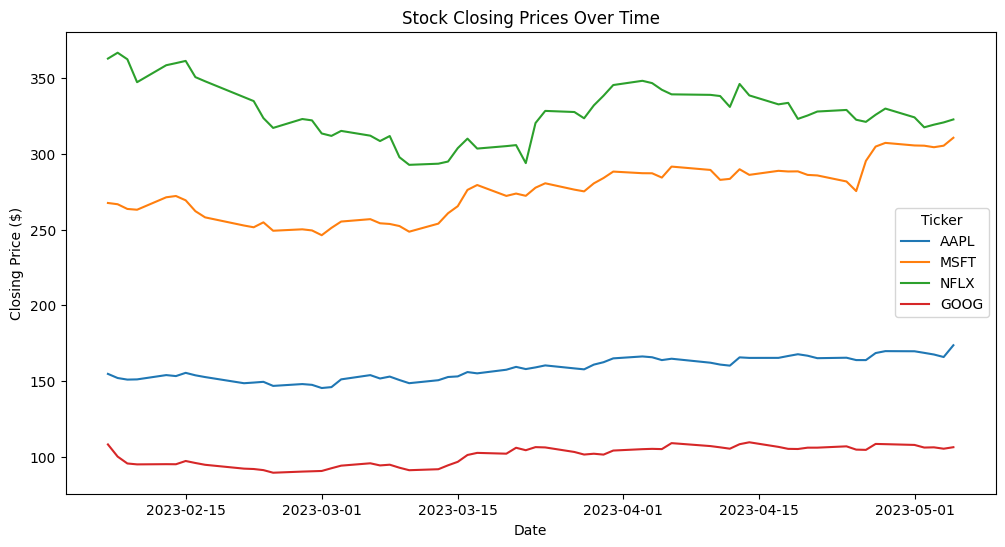

In [ ]:
# Lineplot of closing prices
plt.figure(figsize=(12,6))
sns.lineplot(data=stock_data, x='Date', y='Close',hue='Ticker')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.show()

As seen above, the closing price of NETFLIX is the highest among all over the period of observation and Google is at the bottom, nearly one-third of the top ticker. The rest fell in between. As we will explore the relationship between volume and ticker, further insight will be unveiled regarding the maximum, minimum and mean prices.

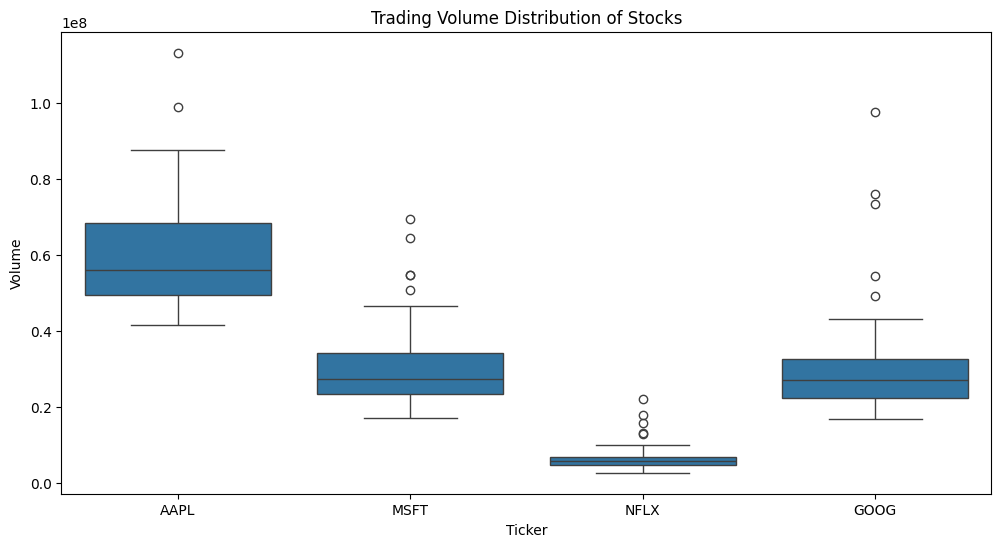

In [ ]:
# Traded Volume of stocks
plt.figure(figsize = (12,6))
sns.boxplot(data = stock_data, x = 'Ticker', y = 'Volume')
plt.title('Trading Volume Distribution of Stocks')
plt.show()

The boxplot observations show NETFLIX saw least traded volume as expected due to the higher share prices. Also the outliers on the maximum share prices reflet some highest bids over perticular days. The correlation heatmap will further provide deeper insights.

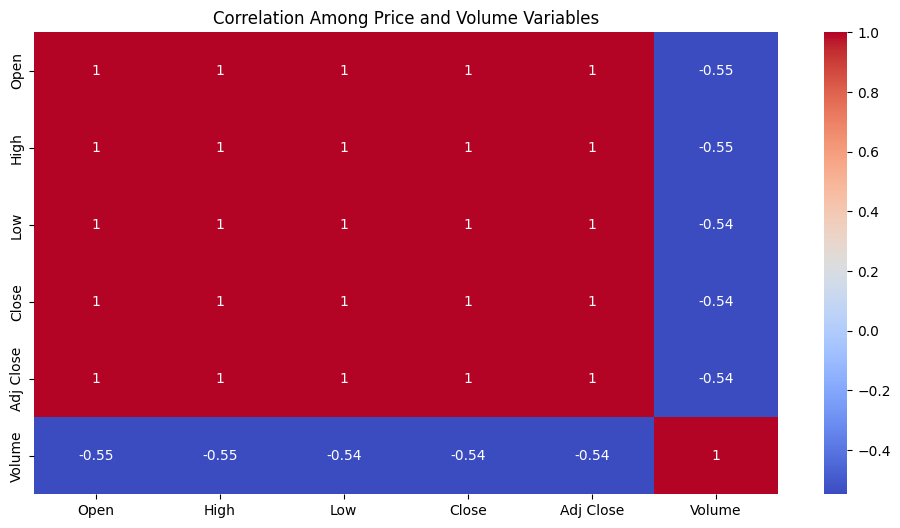

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(stock_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Among Price and Volume Variables')
plt.show()

Observations from the above heatmap Open, High, Low, Close, Adj Close all have a perfect correlation (1.00) with each other. This is logical and expected as stock prices are related to each other. Since all of these are perfectly co-linear, we can drop the others and only choose one in ML modeling as including all of them may lead to multicolinarity in the model. The Adj Close seems most logical for long-term price modeling.

However, the negative correlation of volume with the other parameters shows the decrease in traded volume as the price increases. This is again logical as higher prices often relate to lower purchases. We can include volume as another parameter in ML since it may contain independent information which might not be captured in the prices.

<function matplotlib.pyplot.show(close=None, block=None)>

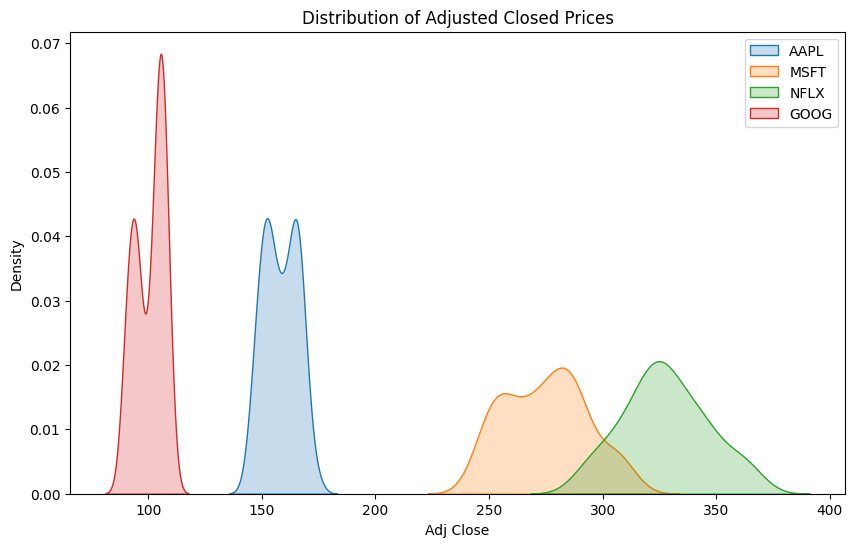

In [ ]:
# KDE of Adjusted Closed Prices
plt.figure(figsize = (10,6))
for ticker in stock_data['Ticker'].unique():
  sns.kdeplot(stock_data[stock_data['Ticker'] == ticker]['Adj Close'], label = ticker, fill = True)
plt.title('Distribution of Adjusted Closed Prices')
plt.legend()
plt.show

The KDE (Kernel Density Estimation) graph shows the peak prices and distribution of each stock price. GOOG and AAPl show narrow curves indicating low volatility and narrow price range, while MSFT and NFLX show wider fluctuations in price. GOOG and AAPl also have bimodal peaks, showing two possible distinct trading phases. NFLX and MSFT distributions slightly overlap, implying similar pricing at certain time windows.

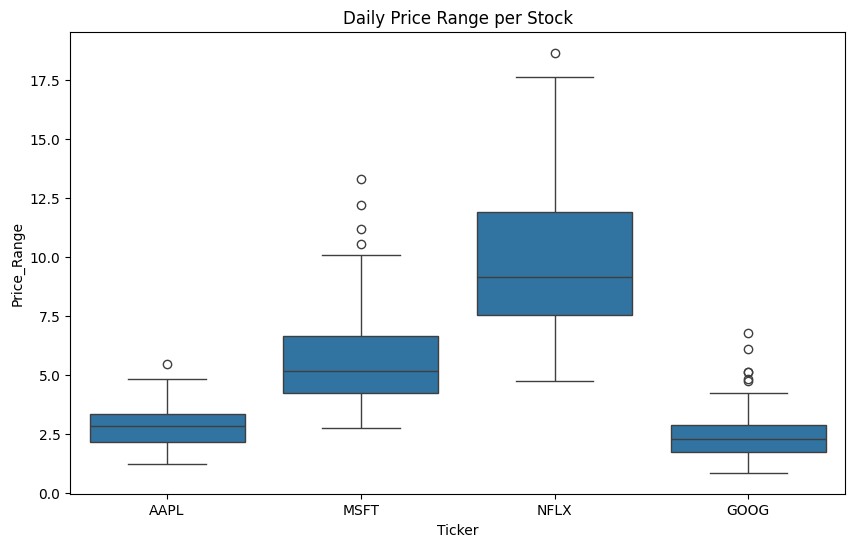

In [ ]:
# Price Range across stocks
plt.figure(figsize=(10, 6))
sns.boxplot(data=stock_data, x='Ticker', y='Price_Range')
plt.title('Daily Price Range per Stock')
plt.show()

The figure shows NFLX having the highest average and maximum daily price whereas GOOG is the lowest, very similar to AAPL, which is opposite to the box plot of volumes. This is due to the fact that the volume went down as the prices increased.

From now, we will use Machine Learning to train and test a model to predict the Adjusted Stock prices in future.

Since, simple models like random forest and linear regeression are not desigened to handle time series variable data like stock prices, we will use more robust method like XGBRegressor to train an test the model and predict the prices.

In [ ]:
# Using XGBRegressor to perform ML and evaluate the results
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# Parameter distributions
param_dist = {
    'n_estimators': randint(100, 400),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

xgb = XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    scoring='neg_root_mean_squared_error',
    n_iter=30,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

random_search.fit(X_train_scaled, y_train)

# Results
print("Best Parameters:", random_search.best_params_)
print("Best RMSE:", -random_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'colsample_bytree': np.float64(0.7842803529062142), 'learning_rate': np.float64(0.1185392166316497), 'max_depth': 3, 'n_estimators': 256, 'subsample': np.float64(0.9406590942262119)}
Best RMSE: 4.53346956675217


As the results show the different best parameters of the model, the learning rate is moderate, depth is not too deep to avoid complexity and the rms error, which is 4.53, is within the expected range since our stock prices are relatively large. We will see the same in the graph below.

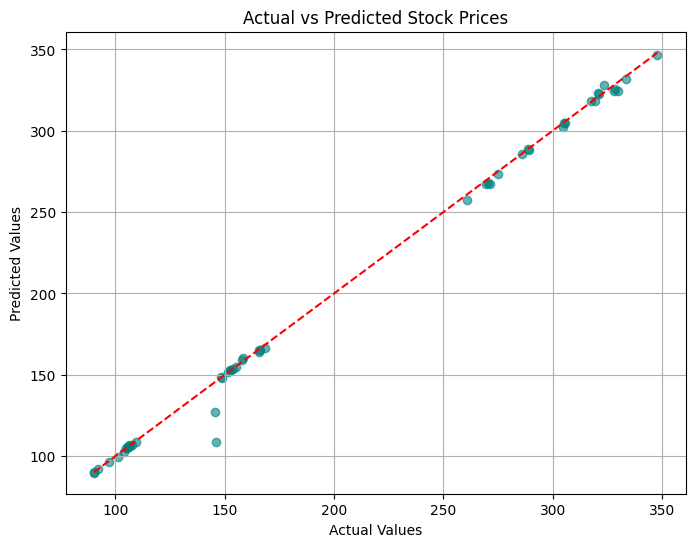

In [ ]:
# Visualising the Actual vs Predicted Stock Prices

X_test_scaled = scaler.transform(X_test)
y_pred = random_search.best_estimator_.predict(X_test_scaled)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Stock Prices')
plt.grid(True)
plt.show()

As the graph shows, the actual values nicely coincide with the predicted ones and there are no major fluctuations from the reference line apart from the 2 outliers. This suggests our model is very accurate in predicting the prices, which can be tuned further for better results.